### Imports

In [29]:
import sys
sys.path.append("../")
import pandas as pd
import matplotlib.pyplot as plt
from src.utils.sft_constants import FINAL_SCRAPED_DATASET_PATH
from src.python.plots import histogram, left_right_tail, QuantileInfo
from src.python.post_processor import check_empty_content_title, clean_scraped_df, remove_outliers, OutlierWordThreshold

### Data Loading

In [2]:
# df = pd.read_json("../src/data/content/scraped_content.json", orient="index")
df = pd.read_csv("../src/data/content/final_data_244k.csv")

In [3]:
df.head()

,url,title,content,status,error_msg,total_title_char,total_content_char,total_title_words,total_content_words
0,https://andhrapradesh.suryaa.com/andhra-prades...,పోలీస్ స్టేషన్‌పై ఉగ్రవాదుల దాడి,జమ్ముకశ్మీర్: పోలీస్ స్టేషన్‌పై ఉగ్రవాదులు దాడ...,Success,NaN,32,256,4,26
1,https://andhrapradesh.suryaa.com/andhra-prades...,రసవత్తరంగా మారుతున్నతమిళ రాజకీయాలు,తమిళనాడు రాజకీయాలు మళ్లీ రసవత్తరంగా మారుతున్నా...,Success,NaN,34,1095,3,135
2,https://andhrapradesh.suryaa.com/andhra-prades...,మాటు వేసి వైఎస్సార్‌సీపీ కౌన్సిలర్‌ హత్య,సూళ్లూరుపేట పట్టణంలో వైఎస్సార్‌సీపీ కౌన్సిలర్‌...,Success,NaN,40,1982,5,232
3,https://telugu.suryaa.com/telugu-latest-update...,డెంగ్యూతో గుజరాత్‌ కు చెందిన బీజేపీ ఎమ్మెల్యే ...,గుజరాత్‌ కు చెందిన బీజేపీ ఎమ్మెల్యే ఆశాపటేల్‌ ...,Success,NaN,54,516,7,63
4,https://andhrapradesh.suryaa.com/andhra-prades...,విశాఖ పర్యటనకు సీఎం జగన్ షెడ్యూల్ ఖరారు,ఆంధ్రప్రదేశ్ ముఖ్యమంత్రి జగన్ మోహన్ రెడ్డి వాహ...,Success,NaN,39,394,6,47


### Data Sanity Check

In [4]:
empty_title_content, only_empty_content, only_empty_title, empty_title_content = check_empty_content_title(df)

Total Empty Title & Content:  0
Total only Empty Title:  0
Total only Empty Content:  0
Total Empty Title or Content 0


### Data Cleaning

In [5]:
cleaned_df = clean_scraped_df(df)

In [6]:
cleaned_df.describe()

,error_msg,total_title_char,total_content_char,total_title_words,total_content_words
count,0.0,237200.000000,237200.000000,237200.000000,237200.000000
mean,NaN,42.860063,776.819203,5.584549,94.775940
std,NaN,16.075485,574.470347,2.042073,70.456279
min,NaN,7.000000,2.000000,1.000000,0.000000
25%,NaN,33.000000,395.000000,4.000000,49.000000
50%,NaN,41.000000,601.000000,5.000000,73.000000
75%,NaN,51.000000,955.000000,7.000000,117.000000
max,NaN,1676.000000,20852.000000,192.000000,2479.000000


### Exploratory Data Analysis

### Title Analysis

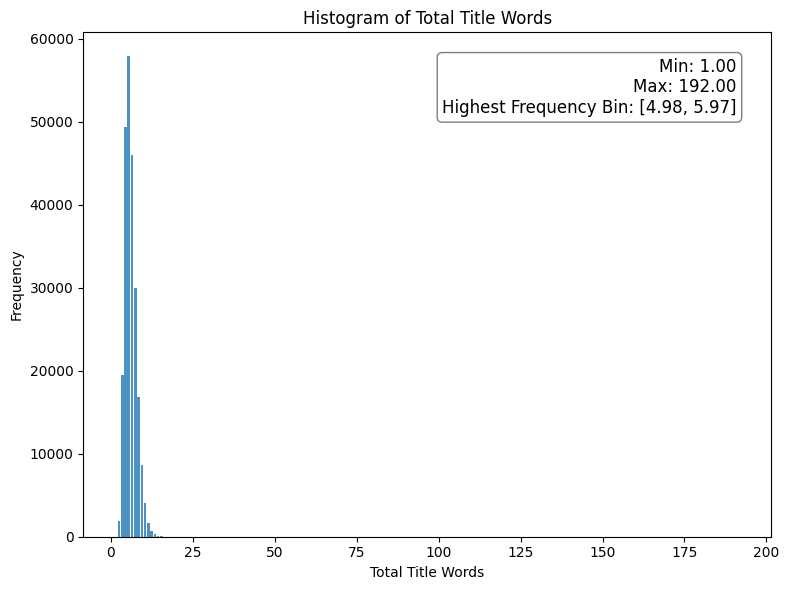

In [9]:
histogram(
    df=cleaned_df,
    column='total_title_words'
)

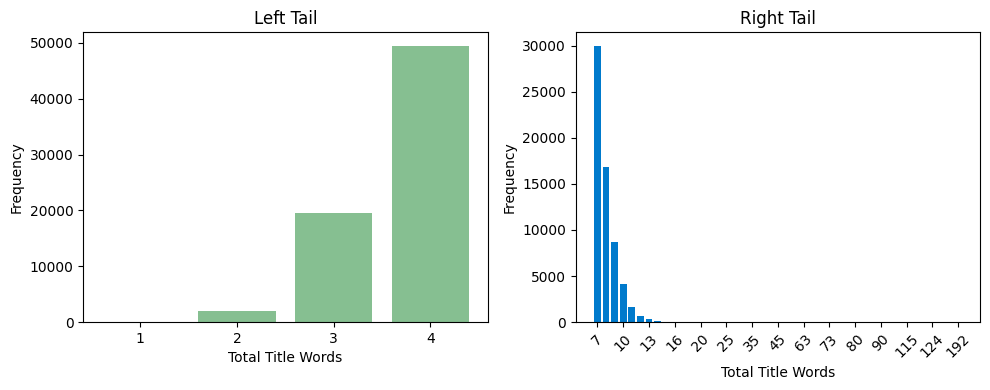

In [19]:
left_quantile = QuantileInfo(
    threshold=0.25,
    label_frequency=1,
    label_rotation=0
)
right_quantile = QuantileInfo(
    threshold=0.75,
    label_frequency=3,
    label_rotation=45
)

left_right_tail(
    df=cleaned_df,
    column='total_title_words',
    left_quantile=left_quantile,
    right_quantile=right_quantile
)

### Article Content Analysis

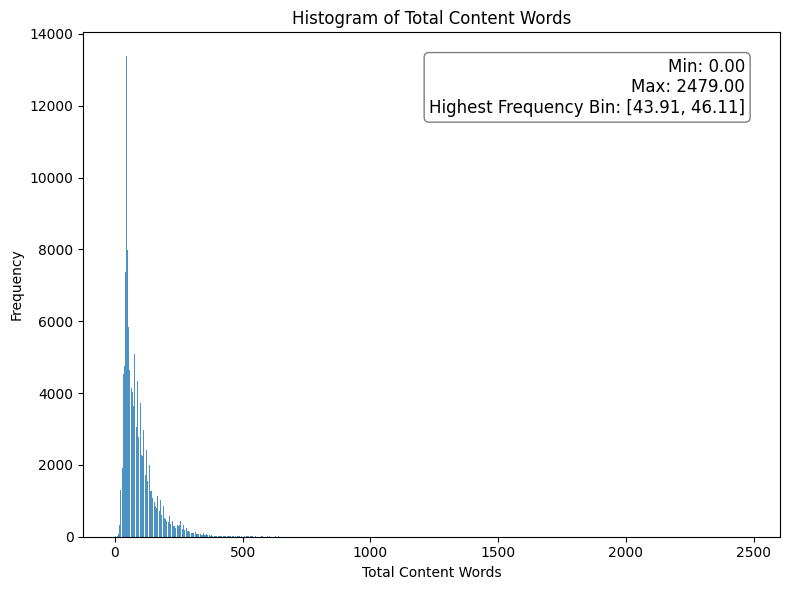

In [20]:
histogram(
    df=cleaned_df,
    column='total_content_words'
)

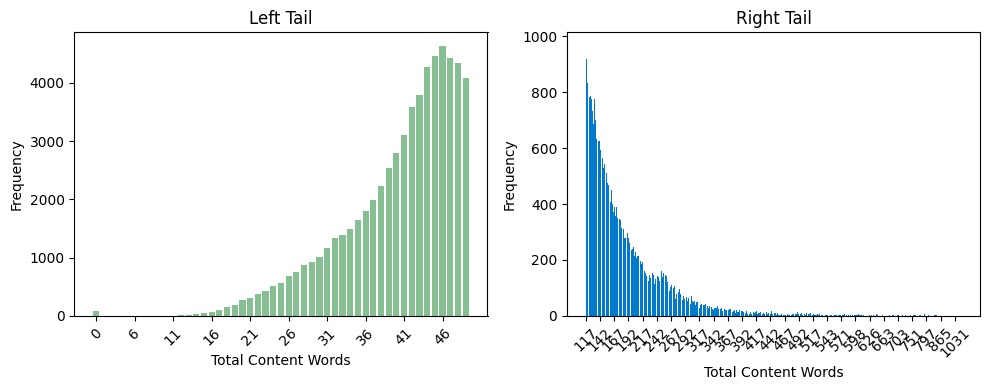

In [21]:
left_quantile = QuantileInfo(
    threshold=0.25,
    label_frequency=5,
    label_rotation=45
)
right_quantile = QuantileInfo(
    threshold=0.75,
    label_frequency=25,
    label_rotation=45
)

left_right_tail(
    df=cleaned_df,
    column='total_content_words',
    left_quantile=left_quantile,
    right_quantile=right_quantile
)

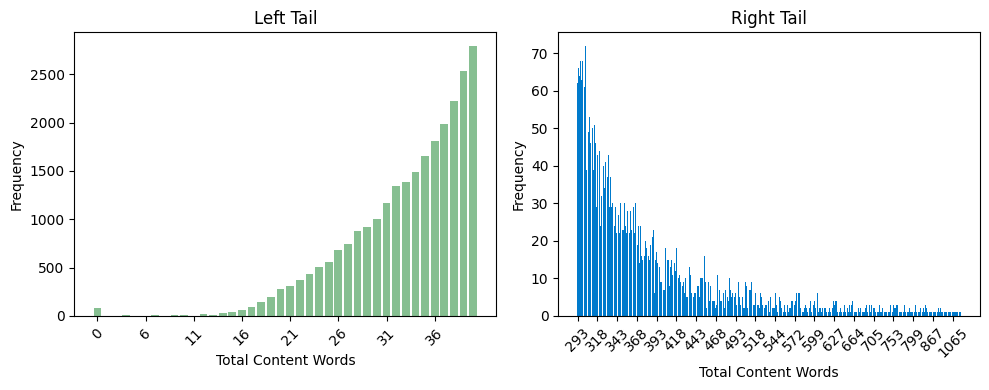

In [22]:
left_quantile = QuantileInfo(
    threshold=0.10,
    label_frequency=5,
    label_rotation=45
)
right_quantile = QuantileInfo(
    threshold=0.98,
    label_frequency=25,
    label_rotation=45
)

left_right_tail(
    df=cleaned_df,
    column='total_content_words',
    left_quantile=left_quantile,
    right_quantile=right_quantile
)

### Outlier Removal

In [28]:
outlier_threshold = OutlierWordThreshold(
    min_title_length = 3,
    max_title_length = 12,
    min_content_length = 20,
    max_content_length = 500
)

In [30]:
final_df = remove_outliers(
    df=cleaned_df,
    threshold=outlier_threshold
)

In [ ]:
### Save the Dataset

In [34]:
final_df.to_csv("../src/data/content/cleaned_scraped_content.csv", index=False)